In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Set some pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# --- 1. Load Cleaned Data ---

In [3]:
CLEANED_DATA_PATH = os.path.join("..", "data", "processed", "cleaned_ai_jobs_data.csv")
df = pd.read_csv(CLEANED_DATA_PATH)

# --- Initial Data Inspection ---
print("--- Initial Data Inspection ---")
print("Shape of the dataset (rows, columns):", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
df.info() # Gives data types and non-null counts
print("\nSummary statistics for numerical features:")
print(df.describe())
print("\nSummary statistics for categorical features:")
print(df.describe(include=['object']))
print("\nPercentage of missing values per column:")
print((df.isnull().sum() / len(df)) * 100)

--- Initial Data Inspection ---
Shape of the dataset (rows, columns): (15000, 19)

First 5 rows:
    job_id              job_title  salary_usd salary_currency experience_level employment_type company_location company_size employee_residence  remote_ratio                                  required_skills education_required  years_experience    industry posting_date application_deadline  job_description_length  benefits_score       company_name
0  ai00001  ai research scientist       90376             usd               se              ct            china            m              china            50         tableau, pytorch, kubernetes, linux, nlp           bachelor                 9  automotive   2024-10-18           2024-11-07                    1076             5.9    smart analytics
1  ai00002   ai software engineer       61895             usd               en              ct           canada            m            ireland           100  deep learning, aws, mathematics, python, docke

# --- Univariate Analysis ---

# 1. Salary Distribution

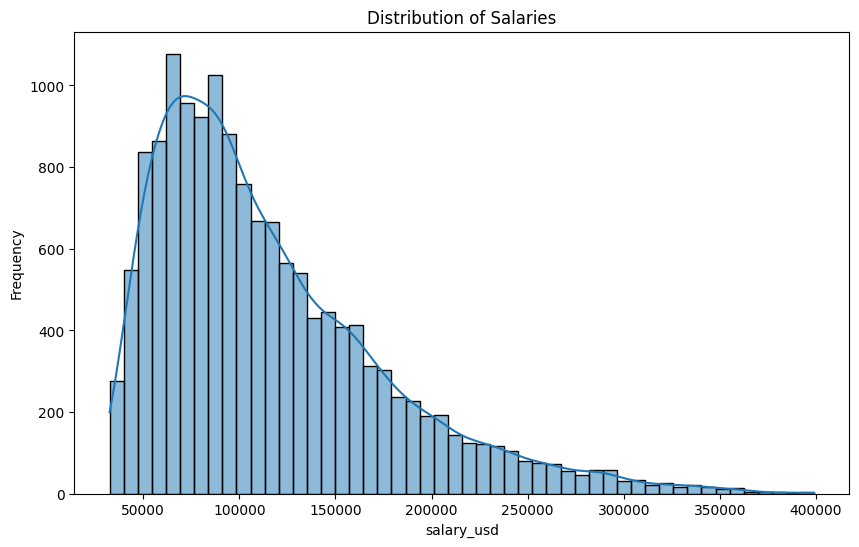

In [4]:
if 'salary_usd' in df.columns and pd.api.types.is_numeric_dtype(df['salary_usd']):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['salary_usd'], kde=True, bins=50)
    plt.title('Distribution of Salaries')
    plt.xlabel('salary_usd')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("'salary_usd' column not suitable for numeric histogram or does not exist.")

# 2. Categorical Features - Top N

In [5]:
def plot_top_n(column_name, n=10, title_prefix="Top"):
    if column_name in df.columns:
        plt.figure(figsize=(12, 7))
        top_n = df[column_name].value_counts().nlargest(n)
        sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")
        plt.title(f'{title_prefix} {n} {column_name.replace("_", " ").title()}')
        plt.xlabel(column_name.replace("_", " ").title())
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{column_name}' not found.")

C:\Users\cfmor\AppData\Local\Temp\ipykernel_17072\1666067517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")


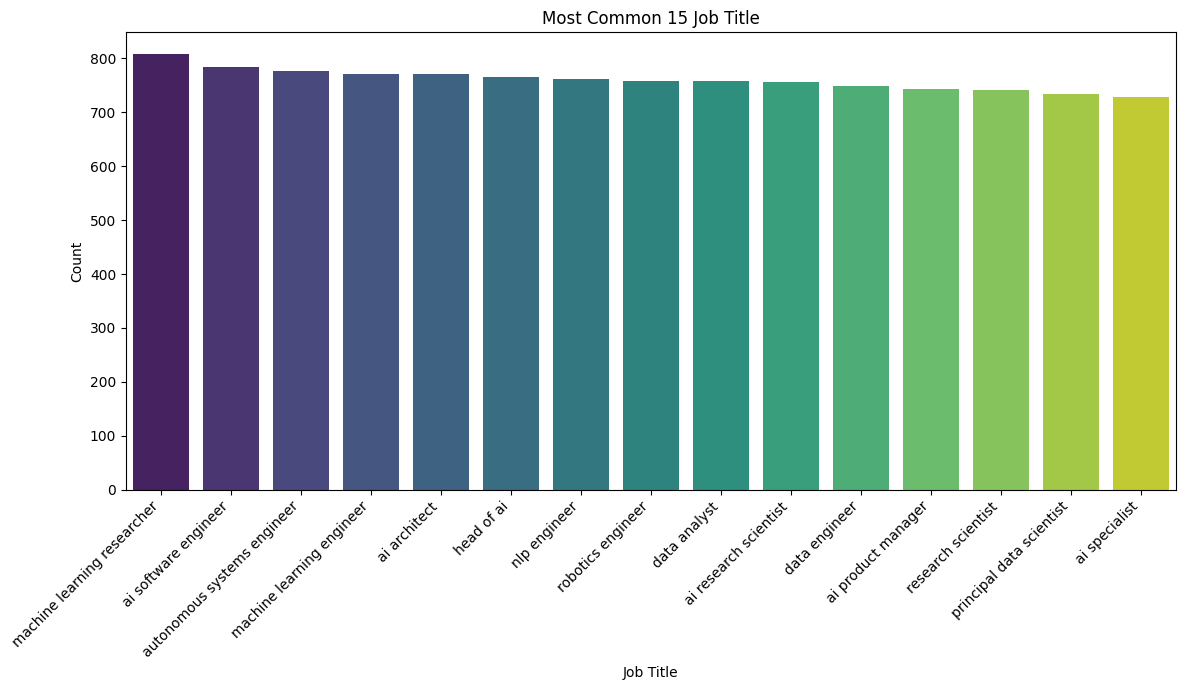

C:\Users\cfmor\AppData\Local\Temp\ipykernel_17072\1666067517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")


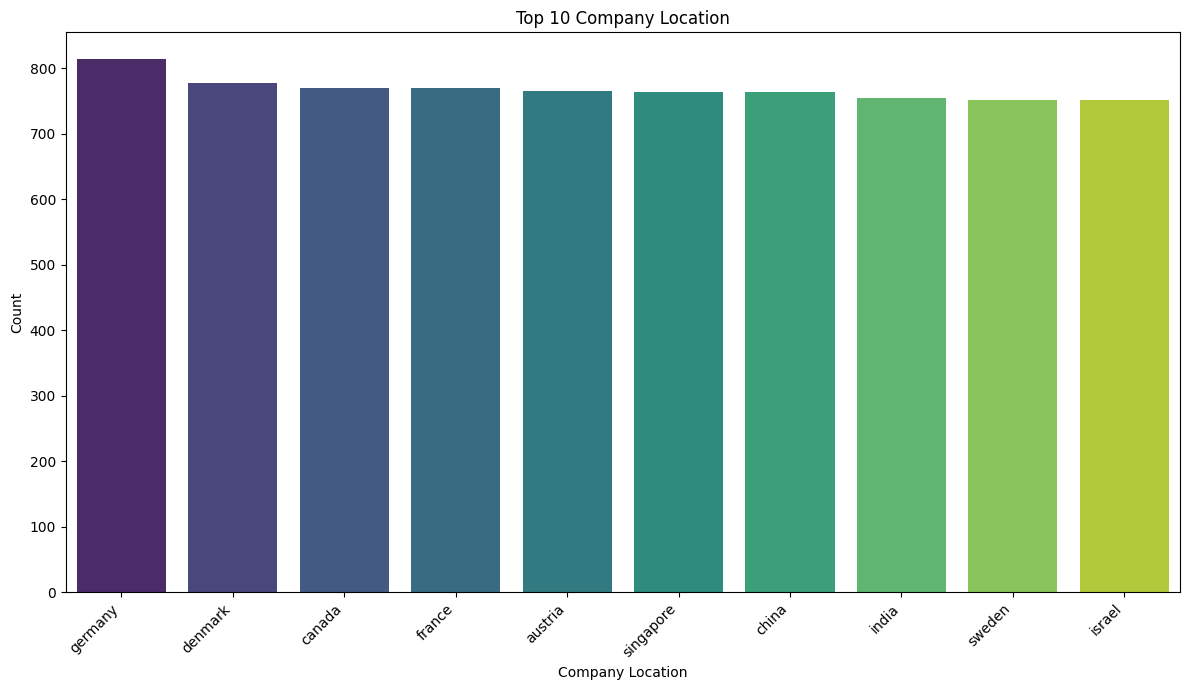

C:\Users\cfmor\AppData\Local\Temp\ipykernel_17072\1666067517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")


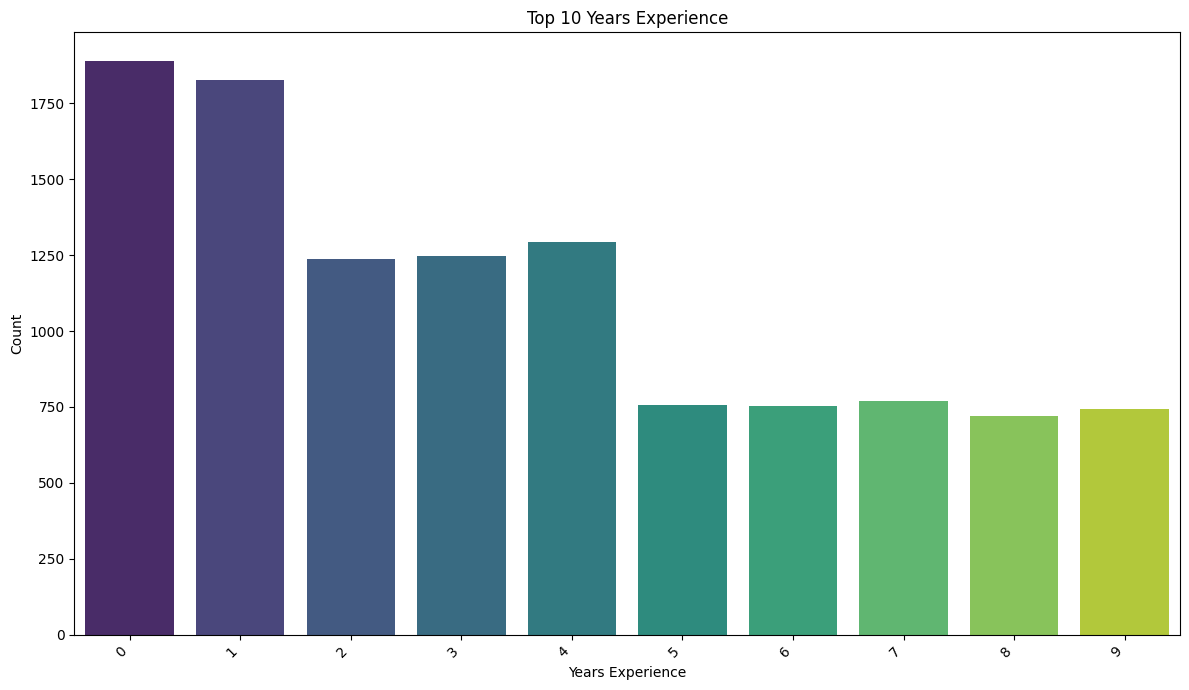

C:\Users\cfmor\AppData\Local\Temp\ipykernel_17072\1666067517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")


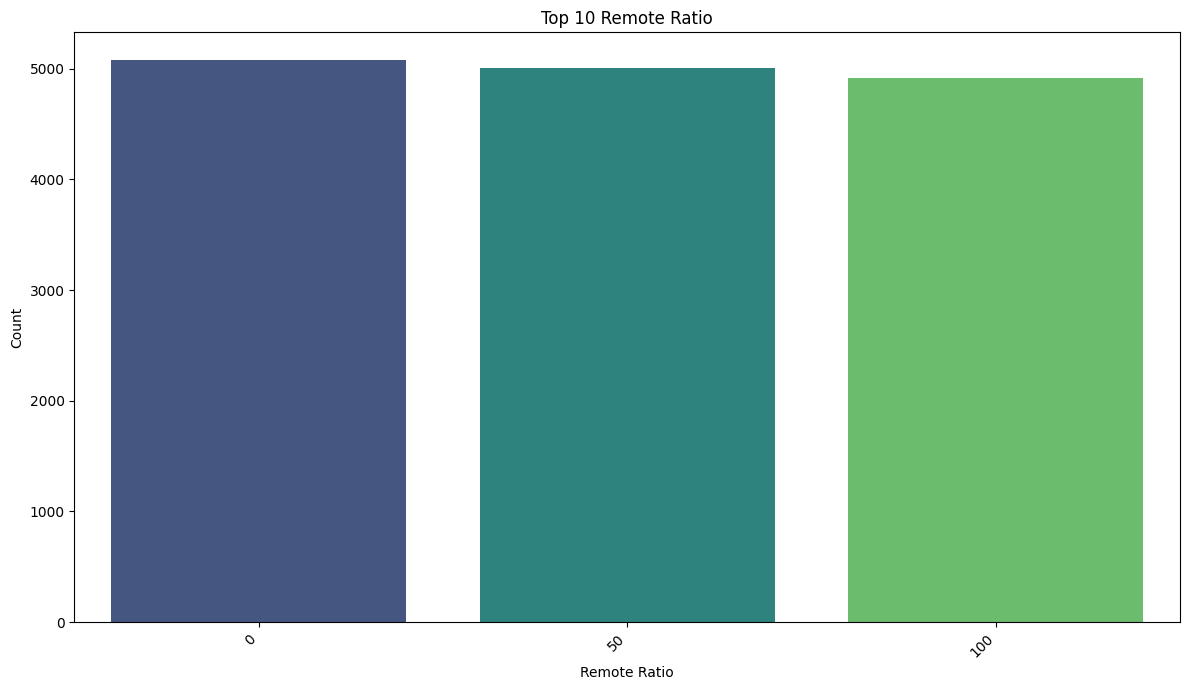

C:\Users\cfmor\AppData\Local\Temp\ipykernel_17072\1666067517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")


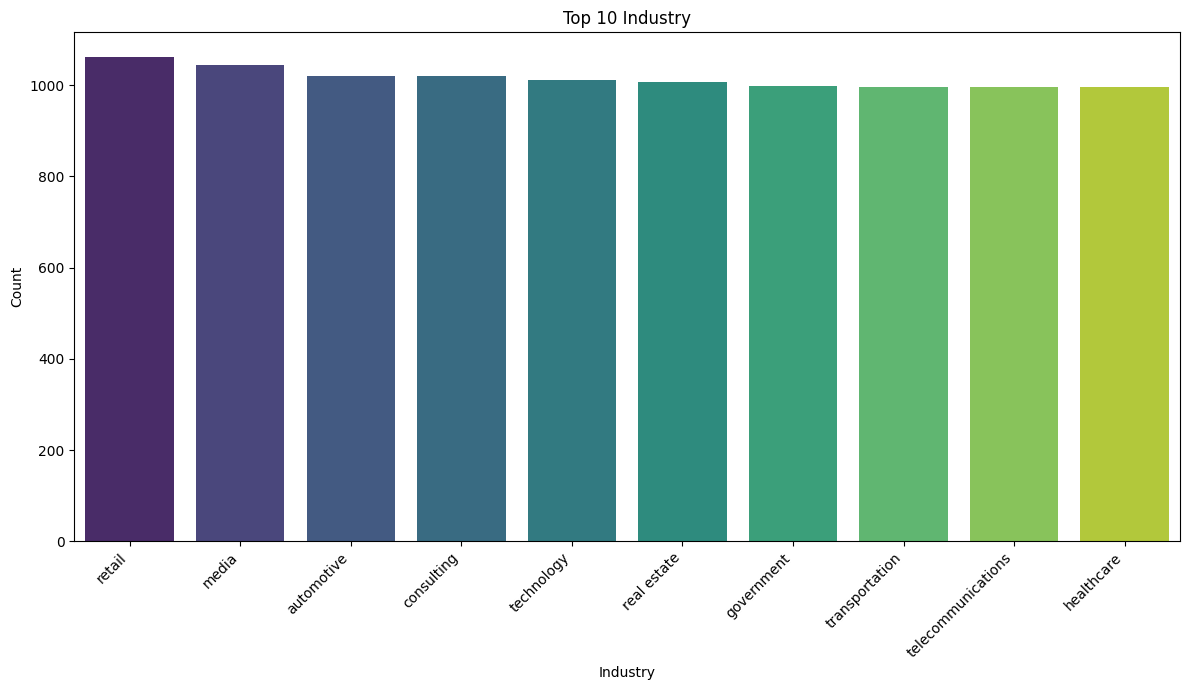

C:\Users\cfmor\AppData\Local\Temp\ipykernel_17072\1666067517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")


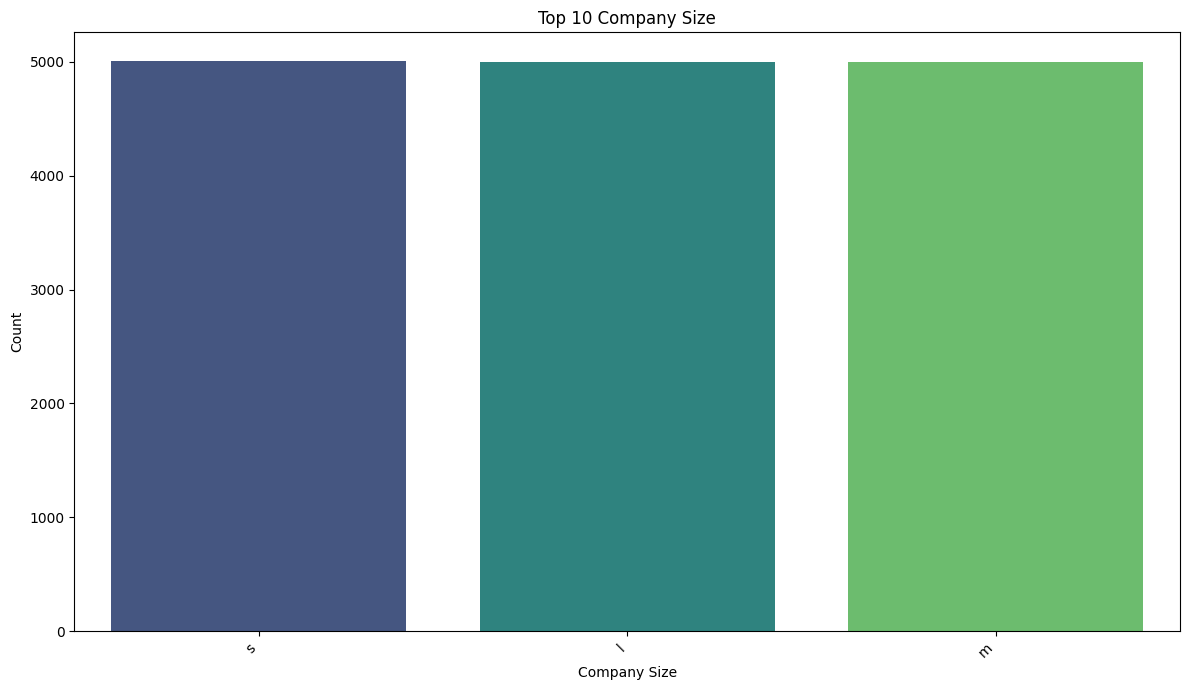

In [6]:
plot_top_n('job_title', n=15, title_prefix="Most Common")
plot_top_n('company_location', n=10)
plot_top_n('years_experience')
plot_top_n('remote_ratio')
plot_top_n('industry', n=10)
plot_top_n('company_size')

# 3. Skills Analysis

C:\Users\cfmor\AppData\Local\Temp\ipykernel_17072\1207959975.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=df_top_skills, palette='mako')


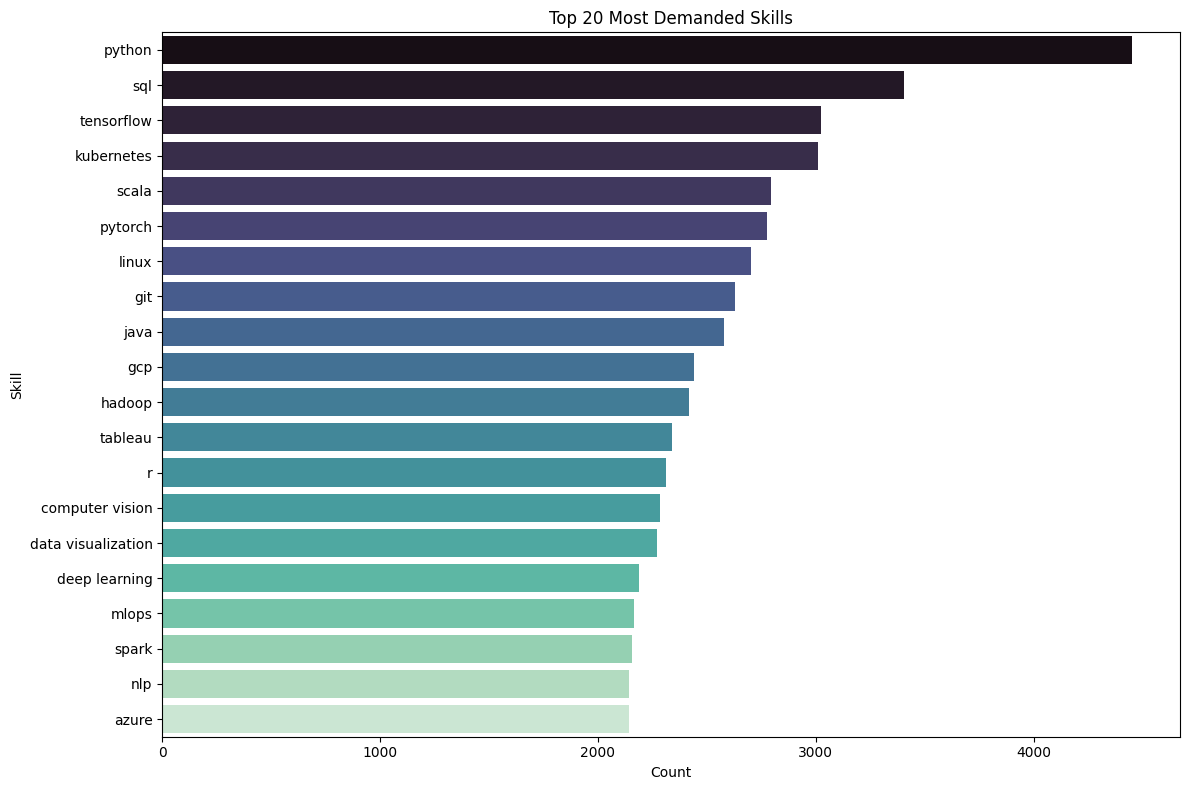

In [7]:
if 'required_skills' in df.columns and df['required_skills'].dtype == 'object':
    from collections import Counter
    
    # Split skills, flatten list, and count
    # Ensure skills are strings and handle potential NaN/float values if cleaning was incomplete
    all_skills = []
    for skill_list_str in df['required_skills'].astype(str):
        if skill_list_str.lower() != 'not specified' and skill_list_str.lower() != 'nan':
            all_skills.extend([skill.strip() for skill in skill_list_str.split(',')])
            
    skill_counts = Counter(all_skills)
    top_skills = skill_counts.most_common(20)
    
    if top_skills:
        df_top_skills = pd.DataFrame(top_skills, columns=['Skill', 'Count'])
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Count', y='Skill', data=df_top_skills, palette='mako')
        plt.title('Top 20 Most Demanded Skills')
        plt.xlabel('Count')
        plt.ylabel('Skill')
        plt.tight_layout()
        plt.show()
    else:
        print("No skills data processed for plotting.")

# --- Bivariate Analysis ---

In [8]:
# job_id job_title  salary_usd salary_currency experience_level employment_type company_location company_size employee_residence  remote_ratiorequired_skills education_required  years_experience    industry posting_date application_deadline  job_description_length  benefits_score       company_name

In [9]:
df['experience_level'].value_counts()

experience_level
mi    3781
ex    3760
se    3741
en    3718
Name: count, dtype: int64

Original columns before lowercasing: ['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name', 'salary_usd_bin']
Lowercase columns after standardization: ['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name', 'salary_usd_bin']

Salary_USD Info:
  Number of non-NaN salary_usd values: 15000
  Min salary_usd: 32519
  Max salary_usd: 399095
  Calculated upper_salary_limit: 307775.69000000006

Attempting 'Salary vs. Experience L

C:\Users\cfmor\AppData\Local\Temp\ipykernel_17072\2962349670.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level_full', y='salary_usd', data=exp_level_data, order=current_exp_plot_order, palette="coolwarm")


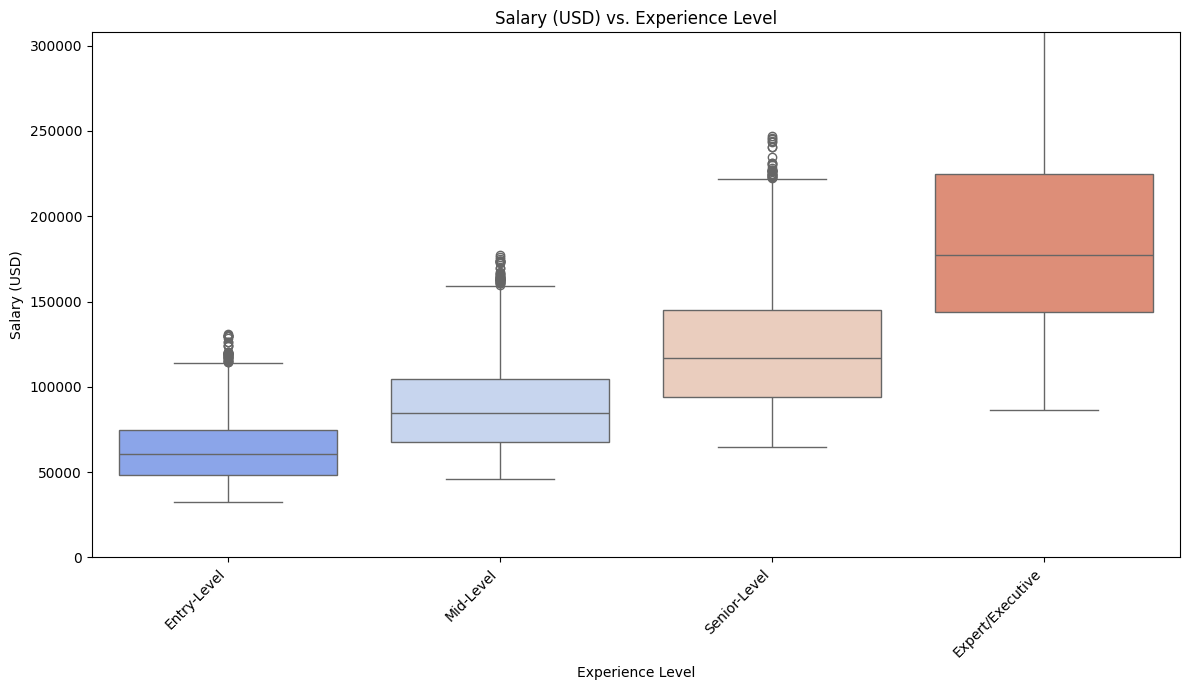


Attempting 'Salary vs. Company Location' plot...


C:\Users\cfmor\AppData\Local\Temp\ipykernel_17072\2962349670.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=location_col_name, y='salary_usd', data=df_top_locations, palette="Spectral", order=top_locations)


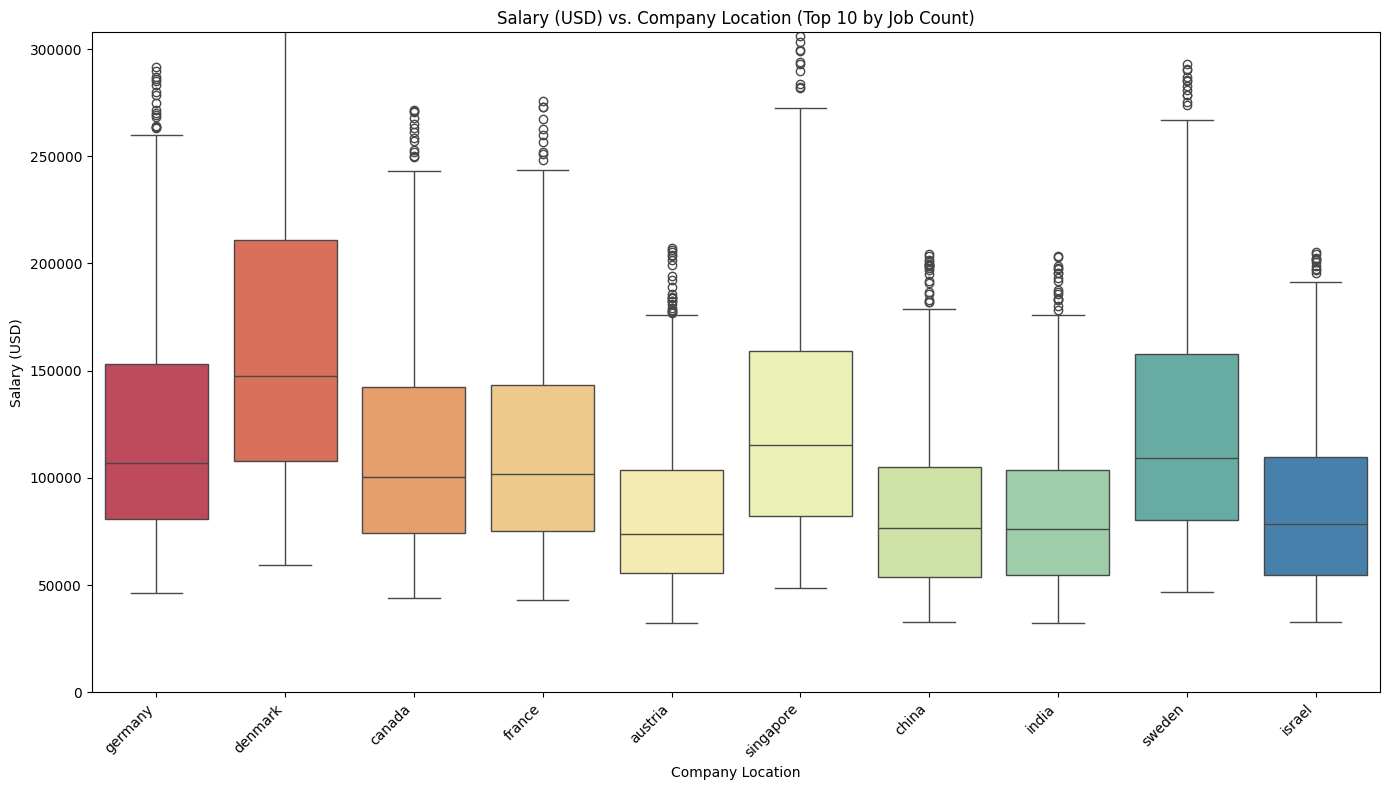


Attempting 'Salary vs. Industry' plot...


C:\Users\cfmor\AppData\Local\Temp\ipykernel_17072\2962349670.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=industry_col_name, y='salary_usd', data=df_top_industries, palette="rocket", order=top_industries)


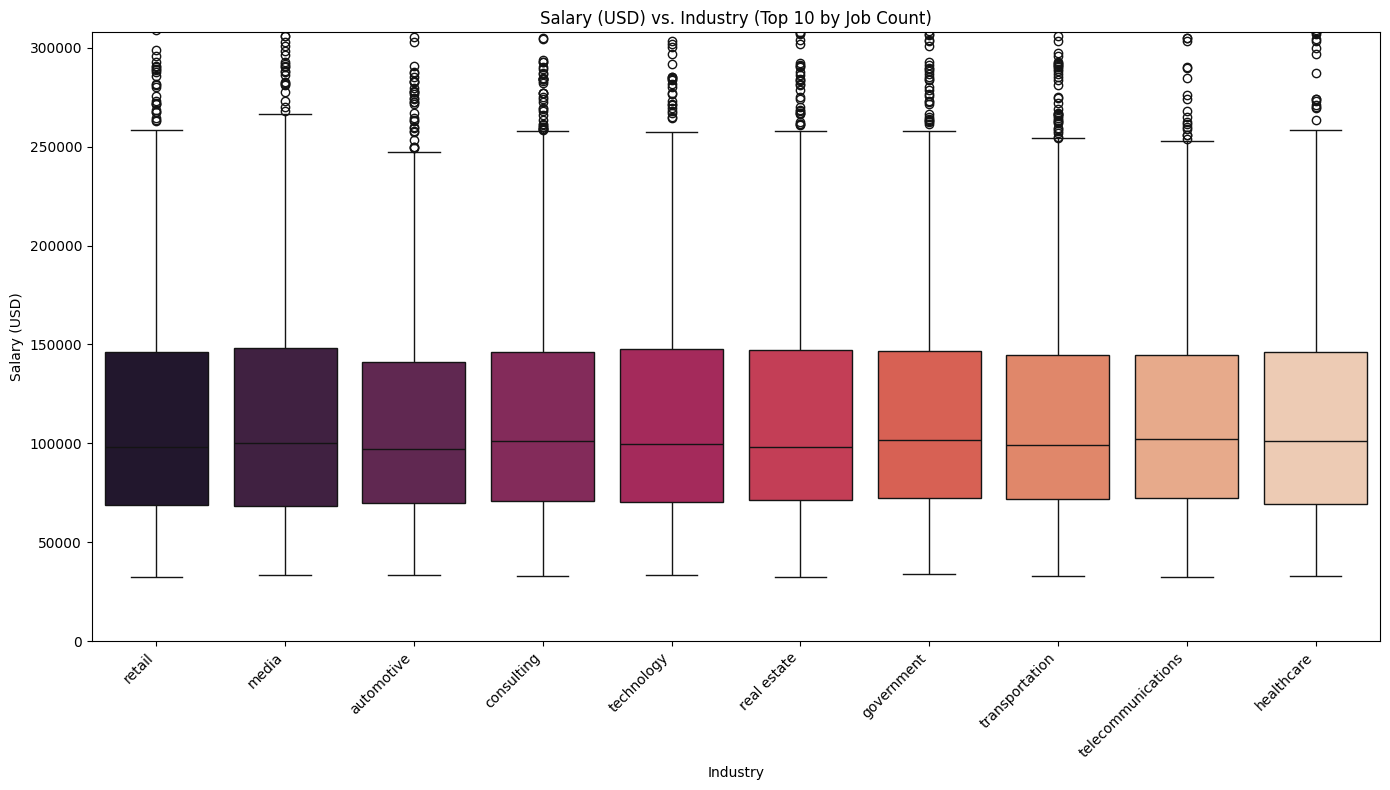

In [10]:
TRANSFORMED_DATA_PATH = os.path.join("..", "data", "processed", "transformed_ai_jobs_data.csv") # Ensure this filename is correct

try:
    df_transformed = pd.read_csv(TRANSFORMED_DATA_PATH)
    print("Original columns before lowercasing:", df_transformed.columns.tolist())

    # Standardize all column names to lowercase and replace spaces with underscores
    df_transformed.columns = [col.lower().replace(' ', '_') for col in df_transformed.columns]
    print("Lowercase columns after standardization:", df_transformed.columns.tolist())

    # --- Define upper_salary_limit ---
    upper_salary_limit = None
    if 'salary_usd' in df_transformed.columns and \
       not df_transformed['salary_usd'].empty and \
       pd.api.types.is_numeric_dtype(df_transformed['salary_usd']) and \
       df_transformed['salary_usd'].notna().any():
        
        print(f"\nSalary_USD Info:")
        print(f"  Number of non-NaN salary_usd values: {df_transformed['salary_usd'].notna().sum()}")
        print(f"  Min salary_usd: {df_transformed['salary_usd'].dropna().min()}")
        print(f"  Max salary_usd: {df_transformed['salary_usd'].dropna().max()}")
        
        upper_salary_limit = df_transformed['salary_usd'].dropna().quantile(0.99)
        print(f"  Calculated upper_salary_limit: {upper_salary_limit}")
    else:
        print("\n'salary_usd' column is missing, empty, not numeric, or all NaN. upper_salary_limit not set.")

    # --- Mapping for experience levels ---
    experience_level_map = {
        'en': 'Entry-Level',
        'mi': 'Mid-Level',
        'se': 'Senior-Level',
        'ex': 'Expert/Executive' # Assuming 'ex' might cover both or is a general term for high experience
    }
    # Define the desired order for plotting
    experience_plot_order = ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Expert/Executive']


    # --- 1. Salary vs. Experience Level ---
    # Ensure 'experience_level' is the correct column name after lowercasing
    experience_col_name = 'experience_level' # This should be correct after lowercasing
    
    if 'salary_usd' in df_transformed.columns and experience_col_name in df_transformed.columns:
        print(f"\nAttempting 'Salary vs. {experience_col_name.replace('_', ' ').title()}' plot...")
        
        # Create a temporary column with full experience level names for plotting
        df_transformed['experience_level_full'] = df_transformed[experience_col_name].map(experience_level_map)
        
        # Filter data for the plot
        exp_level_data = df_transformed[['experience_level_full', 'salary_usd']].copy()
        exp_level_data.dropna(subset=['salary_usd', 'experience_level_full'], inplace=True)

        if exp_level_data.empty or exp_level_data['experience_level_full'].nunique() == 0:
            print(f"Skipping 'Salary vs. {experience_col_name.replace('_', ' ').title()}' plot: No valid data after filtering.")
        else:
            # Ensure the order for plotting only contains levels present in the data
            current_exp_plot_order = [lvl for lvl in experience_plot_order if lvl in exp_level_data['experience_level_full'].unique()]

            if not current_exp_plot_order:
                print(f"Skipping 'Salary vs. {experience_col_name.replace('_', ' ').title()}' plot: No defined experience levels found in data after mapping.")
            else:
                plt.figure(figsize=(12, 7))
                sns.boxplot(x='experience_level_full', y='salary_usd', data=exp_level_data, order=current_exp_plot_order, palette="coolwarm")
                plt.title(f'Salary (USD) vs. {experience_col_name.replace("_", " ").title()}')
                plt.xlabel(experience_col_name.replace("_", " ").title())
                plt.ylabel('Salary (USD)')
                plt.xticks(rotation=45, ha='right')
                if upper_salary_limit is not None:
                    plt.ylim(0, upper_salary_limit)
                plt.tight_layout()
                plt.show()
    else:
        print(f"Skipping 'Salary vs. {experience_col_name.replace('_', ' ').title()}' plot: Required columns ('salary_usd', '{experience_col_name}') not found.")


    # --- 2. Salary vs. Company Location (Top N locations by job count) ---
    # Ensure 'company_location' is the correct column name after lowercasing
    location_col_name = 'company_location' # This should be correct after lowercasing

    if 'salary_usd' in df_transformed.columns and location_col_name in df_transformed.columns:
        print(f"\nAttempting 'Salary vs. {location_col_name.replace('_', ' ').title()}' plot...")
        top_locations_series = df_transformed[location_col_name].value_counts()

        if top_locations_series.empty:
            print(f"Skipping 'Salary vs. {location_col_name.replace('_', ' ').title()}' plot: No location data to determine top locations.")
        else:
            top_locations = top_locations_series.nlargest(10).index
            df_top_locations = df_transformed[df_transformed[location_col_name].isin(top_locations)].copy()
            df_top_locations.dropna(subset=['salary_usd'], inplace=True)

            if df_top_locations.empty:
                print(f"Skipping 'Salary vs. {location_col_name.replace('_', ' ').title()}' plot: No valid data after filtering for top locations and salary_usd.")
            else:
                plt.figure(figsize=(14, 8))
                sns.boxplot(x=location_col_name, y='salary_usd', data=df_top_locations, palette="Spectral", order=top_locations)
                plt.title(f'Salary (USD) vs. {location_col_name.replace("_", " ").title()} (Top 10 by Job Count)')
                plt.xlabel(location_col_name.replace("_", " ").title())
                plt.ylabel('Salary (USD)')
                plt.xticks(rotation=45, ha='right')
                if upper_salary_limit is not None:
                    plt.ylim(0, upper_salary_limit)
                plt.tight_layout()
                plt.show()
    else:
        print(f"Skipping 'Salary vs. {location_col_name.replace('_', ' ').title()}' plot: Required columns ('salary_usd', '{location_col_name}') not found.")


    # --- 3. Salary vs. Industry (Top N industries) ---
    # Ensure 'industry' is the correct column name after lowercasing
    industry_col_name = 'industry' # This should be correct after lowercasing

    if 'salary_usd' in df_transformed.columns and industry_col_name in df_transformed.columns:
        print(f"\nAttempting 'Salary vs. {industry_col_name.replace('_', ' ').title()}' plot...")
        top_industries_series = df_transformed[industry_col_name].value_counts()

        if top_industries_series.empty:
             print(f"Skipping 'Salary vs. {industry_col_name.replace('_', ' ').title()}' plot: No industry data to determine top industries.")
        else:
            top_industries = top_industries_series.nlargest(10).index
            df_top_industries = df_transformed[df_transformed[industry_col_name].isin(top_industries)].copy()
            df_top_industries.dropna(subset=['salary_usd'], inplace=True)

            if df_top_industries.empty:
                print(f"Skipping 'Salary vs. {industry_col_name.replace('_', ' ').title()}' plot: No valid data after filtering for top industries and salary_usd.")
            else:
                plt.figure(figsize=(14, 8))
                sns.boxplot(x=industry_col_name, y='salary_usd', data=df_top_industries, palette="rocket", order=top_industries)
                plt.title(f'Salary (USD) vs. {industry_col_name.replace("_", " ").title()} (Top 10 by Job Count)')
                plt.xlabel(industry_col_name.replace("_", " ").title())
                plt.ylabel('Salary (USD)')
                plt.xticks(rotation=45, ha='right')
                if upper_salary_limit is not None:
                    plt.ylim(0, upper_salary_limit)
                plt.tight_layout()
                plt.show()
    else:
        print(f"Skipping 'Salary vs. {industry_col_name.replace('_', ' ').title()}' plot: Required columns ('salary_usd', '{industry_col_name}') not found.")


except FileNotFoundError:
    print(f"Transformed data file not found at {TRANSFORMED_DATA_PATH}. Please ensure it exists and the path is correct.")
    print("Also, check that 02_data_transformation.py ran successfully and created this file.")
except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()

# --- Correlation Analysis (for numerical features) ---

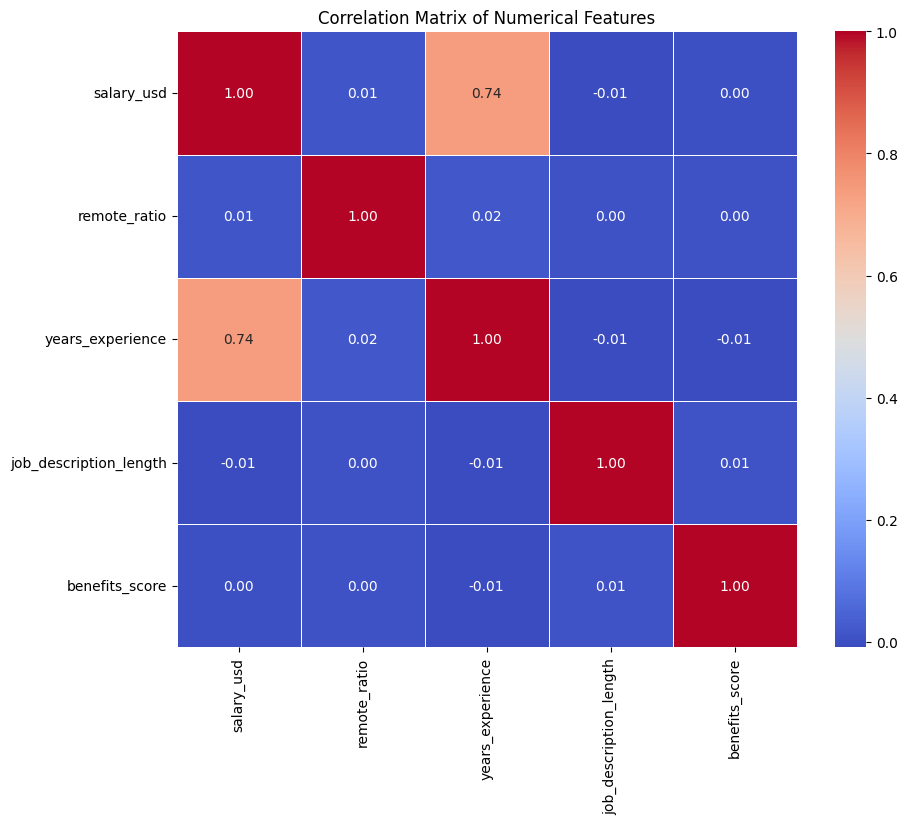

In [11]:
# Select only numeric columns from the transformed dataframe for correlation
numeric_cols = df_transformed.select_dtypes(include=np.number).columns
df_numeric = df_transformed[numeric_cols].copy()

# Drop columns that are IDs or not meaningful for direct correlation with salary,
# or the original salary if salary_usd is present.
cols_to_drop_corr = ['salary'] # Add others like 'year' if it's treated as categorical for salary
df_numeric.drop(columns=[col for col in cols_to_drop_corr if col in df_numeric.columns], inplace=True, errors='ignore')


if not df_numeric.empty:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df_numeric.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
else:
    print("No numeric data available for correlation matrix after filtering.")